# ALL Analysis

In [4]:
import sys
import os;os.chdir('../..')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint
from tools.config import load_config, conf
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [5]:
load_config('inputs/tests/sidis.py')
conf['resman']=RESMAN()
conf['parman']=PARMAN()
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 3013

## Load Data from Files

In [6]:
ALL_SIDIS=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])
ALL=pd.concat([ALL_SIDIS])
#ALL.columns

## Split Data
Organize data from different collaborations with different observables

In [7]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: HERMES, Observerable: AUTcollins, Points: 32
Collaboration: compass, Observerable: AUTcollins, Points: 74


## Start Plotting 
Below we plot the data vs. theory curves

In [8]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [9]:
co = pd.concat([data['HERMES']['AUTcollins'], data['compass']['AUTcollins']])

keepers = ['obs', 'col', 'dependence', 'target', 'hadron', 'x', 'y', 'z', 'pT', 'value', 'alpha', 'thy']

for col in co.columns:
    if col not in keepers:
        co.drop(col, axis=1, inplace=True)

In [10]:
co

,alpha,col,dependence,hadron,obs,pT,target,thy,value,x,y,z
0,0.015446,HERMES,pt,pi-,AUTcollins,0.211,proton,-0.017299,-0.0192,0.1020,0.493,0.346
1,0.014309,HERMES,pt,pi-,AUTcollins,0.290,proton,-0.019138,-0.0246,0.0960,0.525,0.350
2,0.012804,HERMES,pt,pi-,AUTcollins,0.369,proton,-0.019252,-0.0083,0.0890,0.556,0.348
3,0.009567,HERMES,pt,pi-,AUTcollins,0.488,proton,-0.019380,-0.0236,0.0830,0.586,0.349
4,0.008990,HERMES,pt,pi-,AUTcollins,0.670,proton,-0.023455,-0.0354,0.0790,0.619,0.371
0,0.005629,HERMES,z,pi-,AUTcollins,0.352,proton,-0.014243,-0.0155,0.0840,0.596,0.233
1,0.007963,HERMES,z,pi-,AUTcollins,0.385,proton,-0.019665,-0.0252,0.0910,0.553,0.303
2,0.011315,HERMES,z,pi-,AUTcollins,0.411,proton,-0.022504,-0.0307,0.0940,0.530,0.373
3,0.015024,HERMES,z,pi-,AUTcollins,0.430,proton,-0.022928,-0.0204,0.0960,0.515,0.447
4,0.019804,HERMES,z,pi-,AUTcollins,0.444,proton,-0.022093,-0.0246,0.0970,0.504,0.523


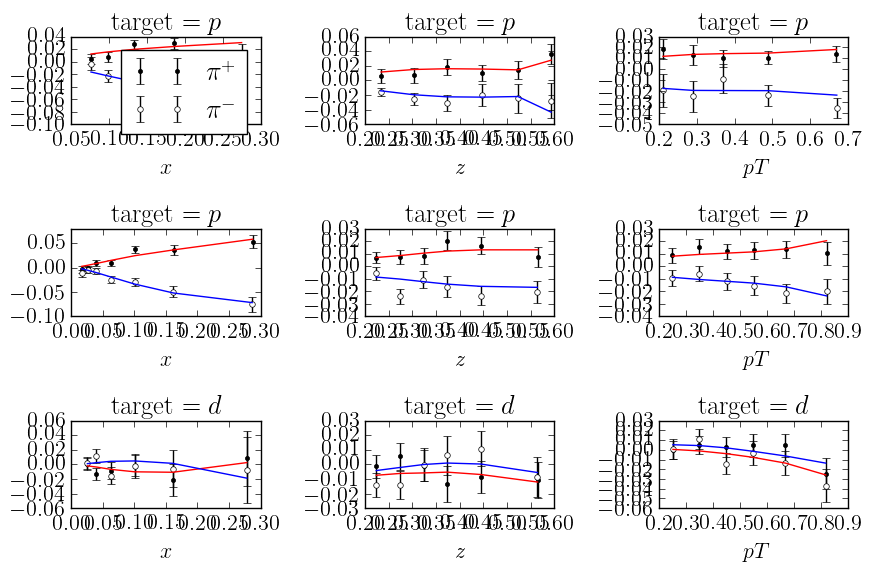

In [11]:
def plot_collins(ax,axis,col,tar):
    if axis=='pT':
        data_pip=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
        if len(data_pip.value)==0:
            data_pip=co.query('dependence=="pt" and target=="%s" and hadron=="%s" and col=="%s" '%(tar,'pi+',col))
            data_pim=co.query('dependence=="pt" and target=="%s" and hadron=="%s" and col=="%s" '%(tar,'pi-',col))
    else:
        data_pip=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
   
    sign=1
    if col=='compass': sign=-1
    ax.errorbar(data_pip[axis],sign*data_pip['value'],yerr=data_pip['alpha'],fmt='k.',label=r'$\pi^+$')
    ax.errorbar(data_pim[axis],sign*data_pim['value'],yerr=data_pim['alpha'],fmt='ko', mfc='white',label=r'$\pi^-$',markersize=4)

    ax.plot(data_pip[axis].values,sign*data_pip['thy'].values,'r-')
    ax.plot(data_pim[axis].values,sign*data_pim['thy'].values,'b-')

    if tar=='proton': star='p'
    if tar=='deuteron': star='d'
 
    ax.set_title(r'${\rm target}=%s$'%(star))
    ax.set_xlabel(r'$%s$'%axis)
    #if axis=='x': ax.set_ylim(-0.05,0.05)

nrows,ncols=3,3
py.figure(figsize=(ncols*3,nrows*2))

cnt=0
for col in ['HERMES','compass']:
    if col=='HERMES': targets=['proton']
    if col=='compass': targets=['proton','deuteron']   
    for tar in targets:
        for axis  in ['x','z','pT']:
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt)
            plot_collins(ax,axis,col,tar)
            if cnt==1: ax.legend()
py.tight_layout()

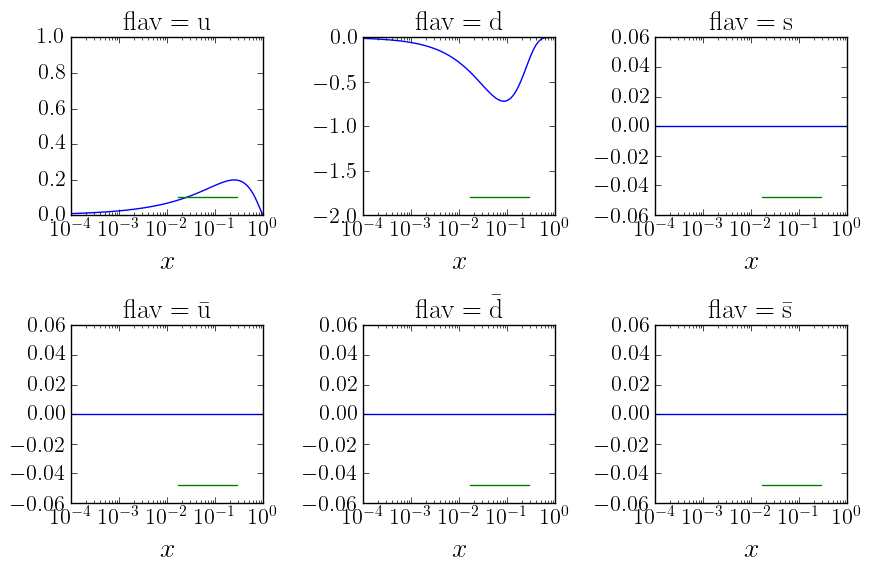

In [12]:
def plot(ax,iflav):
    X=10**np.linspace(-4,-1)
    X=np.append(X,np.linspace(0.1,1))
    Q2=1
    F=[conf['transversity'].get_C(x,Q2,target='p')[iflav] for x in X]
    ax.plot(X,F)

    ymin,ymax=ax.get_ylim()
    if   iflav==1: ax.set_ylim(0,1);ymin,ymax=ax.get_ylim()
    elif iflav==3: ax.set_ylim(-2,0);ymin,ymax=ax.get_ylim()
    xmin=np.amin(co.x.values)
    xmax=np.amax(co.x.values)
    dy=ymax-ymin
    ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
    ax.set_ylim(ymin,ymax)
    ax.semilogx()
    
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$x$',size=20)
    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()

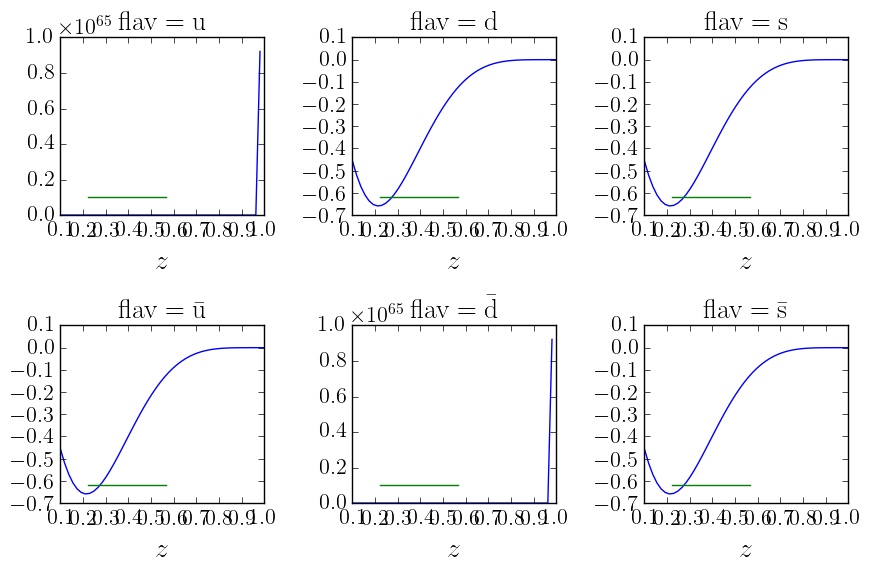

In [14]:
def plot_ff(ax,iflav):
    Z=np.linspace(0.1,1)
    Q2=1
    ZF=[conf['collins'].get_C(z,Q2,hadron='pi+')[iflav] for z in Z]
    ax.plot(Z,Z*ZF)
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$z$',size=20)
    zmin=np.amin(data['compass']['AUTcollins'].z)
    zmax=np.amax(data['compass']['AUTcollins'].z)
    ymin,ymax=ax.get_ylim()
    dy=ymax-ymin
    ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
    ax.set_ylim(ymin,ymax)
    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot_ff(ax,iflav)
py.tight_layout()